# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from api_keys import weather_api_key
from scipy.stats import linregress

### Import API Keys

## Generate Cities List

Generate a list of unique cities based on a random latitude and longitude and using citypy library. A while loop enforces the that the requested number of cities will be generated. It is need because some coordinates generated when used as input for citypy library does not get a valide return.

In [2]:
# Size of the list of cities
num_cities = 1000
latitude_max = 90
longitude_max = 180

cities_list = []
country_list = []
lat_list = []
lng_list = []


while len(cities_list) < num_cities:
    
    # Generate a random latitude using numpy random array multiplied by 90 that is the maximum for latitude
    # and multiple by a random +1 or -1 to give the North or South from Equator
    lat_random = ((latitude_max*np.random.rand(1,1))*(np.random.randint(2, size=1)*2-1))

    # Generate a random longitude using numpy random array multiplied by 180 that is the maximum for longitude
    # and multiple by a random +1 or -1 to give the East or West from Greenwich
    lon_random = ((longitude_max*np.random.rand(1,1))*(np.random.randint(2, size=1)*2-1))

    # Create a list of cities based on the random coordinates and using the citypy library
    city = citipy.nearest_city(lat_random[0][0], lon_random[0][0])
    new_city = city.city_name.title()
    new_city_country = city.country_code.upper()
    

    # Logical test to verify if the city is already include in the list or not
    if new_city not in cities_list:
        cities_list.append(new_city)
        country_list.append(new_city_country)
        lat_list.append(lat_random[0][0])
        lng_list.append(lon_random[0][0])

        
print(f'List of cities has {len(cities_list)} cities.')

List of cities has 1000 cities.


In [3]:
# Create a dataframe with the random latitude and longitude

cities_df = pd.DataFrame({'City':cities_list,
                          'Lat':lat_list,
                          'Lng':lng_list,
                          'Max Temp':'',
                          'Humidity':'',
                          'Cloudiness':'',
                          'Wind Speed':'',
                          'Country':country_list,
                          'Date':''})

cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,32.362213,-161.374165,,,,,US,
1,Vila Velha,-26.807681,-23.591082,,,,,BR,
2,Hilo,28.094516,-145.050017,,,,,US,
3,Rikitea,-36.349633,-113.381646,,,,,PF,
4,Vaini,-70.490646,-171.432084,,,,,TO,
...,...,...,...,...,...,...,...,...,...
995,Ola,58.948708,152.726301,,,,,RU,
996,Meadow Lake,58.146487,-108.397842,,,,,CA,
997,Menongue,-13.800962,18.714461,,,,,AO,
998,Saint-Georges,8.497596,-43.349066,,,,,GF,


In [4]:
# Double check if the list only has unique cities
print(f"The list of cities has {len(cities_df['City'].unique())} unique cities.")


The list of cities has 1000 unique cities.


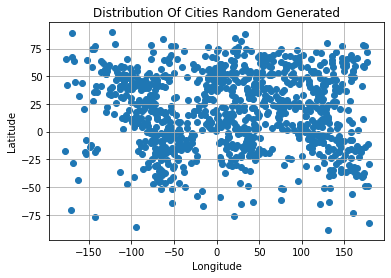

In [52]:
# Generate a scatterplot of the random coordinates.
# Note that coordinates looks to be evenly distributed.
# since the numpy random number distribution has uniform distribution

plt.scatter(x=cities_df['Lng'], y=cities_df['Lat'])
plt.title('distribution of cities random generated'.title())
plt.xlabel('Longitude')
plt.ylabel('Latitude');
plt.grid(True)

Observation: note that due to the nature of the random coordinates (Latitude, Longitude) genaration and the use of citypy to retrieve the name of the nearest city, it is possible to note in the following map that the coordinates sometimes are far from the real city location. 

In [70]:
# Plot the random generated coordinates in the global map
import plotly.express as px
fig = px.scatter_geo(cities_df, lat="Lat", lon="Lng", hover_name="City", projection="natural earth")
fig.show()

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# set up lists to hold reponse info
hum = []
max_temp = []
cloudiness = []
wind_speed = []
time_data_calculation = []
n = 1

# Loop through the list of cities and perform a request for data on each
for city in cities_df['City']:
    response = requests.get(query_url + city).json()


    # Handle exception in case of city data not available in the API
    try:
        print(f"Processing Record {n} of {len(cities_df['City'])} | {city}")
        hum.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        time_data_calculation.append(response['dt'])
    except KeyError:
        print(f"City {city} not found. Skipping...")
        hum.append(np.nan)
        max_temp.append(np.nan)
        cloudiness.append(np.nan)
        wind_speed.append(np.nan)
        time_data_calculation.append(np.nan)
    
    n += 1

    
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Processing Record 1 of 1000 | Kapaa
Processing Record 2 of 1000 | Vila Velha
Processing Record 3 of 1000 | Hilo
Processing Record 4 of 1000 | Rikitea
Processing Record 5 of 1000 | Vaini
Processing Record 6 of 1000 | Tasbuget
City Tasbuget not found. Skipping...
Processing Record 7 of 1000 | Qaanaaq
Processing Record 8 of 1000 | New Norfolk
Processing Record 9 of 1000 | Busselton
Processing Record 10 of 1000 | Kaili
Processing Record 11 of 1000 | Albany
Processing Record 12 of 1000 | Davidson
Processing Record 13 of 1000 | Tsihombe
City Tsihombe not found. Skipping...
Processing Record 14 of 1000 | Sinnamary
Processing Record 15 of 1000 | Lagoa
Processing Record 16 of 1000 | Attawapiskat
City Attawapiskat not found. Skipping...
Processing Record 17 of 1000 | Fortuna
Processing Record 18 of 1000 | Mataura
Processing Record 19 of 1000 | Salalah
Processing Record 20 of 1000 | Hambantota
Processing Record 21 of 1000 | Yellowknife
Processing Record 22 of 1000 | Maldonado
Processing Record 23

Processing Record 187 of 1000 | Mumford
Processing Record 188 of 1000 | Ouallam
Processing Record 189 of 1000 | Tilichiki
Processing Record 190 of 1000 | Lindas
Processing Record 191 of 1000 | Naryan-Mar
Processing Record 192 of 1000 | Ilulissat
Processing Record 193 of 1000 | Ribeira Grande
Processing Record 194 of 1000 | Aksu
Processing Record 195 of 1000 | Moose Factory
Processing Record 196 of 1000 | Bambous Virieux
Processing Record 197 of 1000 | Faanui
Processing Record 198 of 1000 | Negara
Processing Record 199 of 1000 | Ugoofaaru
Processing Record 200 of 1000 | Vardo
Processing Record 201 of 1000 | Abu Kamal
Processing Record 202 of 1000 | Sungaipenuh
Processing Record 203 of 1000 | Namatanai
Processing Record 204 of 1000 | Henties Bay
Processing Record 205 of 1000 | Jacmel
Processing Record 206 of 1000 | Belaya Gora
Processing Record 207 of 1000 | Alpena
Processing Record 208 of 1000 | Vicuna
Processing Record 209 of 1000 | Maud
Processing Record 210 of 1000 | Naze
Processing 

Processing Record 373 of 1000 | Saint-Pierre
Processing Record 374 of 1000 | Minot
Processing Record 375 of 1000 | Mount Gambier
Processing Record 376 of 1000 | Cascais
Processing Record 377 of 1000 | Coruripe
Processing Record 378 of 1000 | Beloha
Processing Record 379 of 1000 | Erenhot
Processing Record 380 of 1000 | Grand Gaube
Processing Record 381 of 1000 | Wenling
Processing Record 382 of 1000 | Sataua
City Sataua not found. Skipping...
Processing Record 383 of 1000 | Wageningen
Processing Record 384 of 1000 | Rantepao
Processing Record 385 of 1000 | Grindavik
Processing Record 386 of 1000 | Etaples
Processing Record 387 of 1000 | Arman
Processing Record 388 of 1000 | Bac Lieu
Processing Record 389 of 1000 | Andarab
City Andarab not found. Skipping...
Processing Record 390 of 1000 | Tessalit
Processing Record 391 of 1000 | Pitimbu
Processing Record 392 of 1000 | San Quintin
Processing Record 393 of 1000 | Port Hawkesbury
Processing Record 394 of 1000 | Thessalon
Processing Record

Processing Record 558 of 1000 | Bakchar
Processing Record 559 of 1000 | Huarmey
Processing Record 560 of 1000 | Inhambane
Processing Record 561 of 1000 | Rungata
City Rungata not found. Skipping...
Processing Record 562 of 1000 | Muriwai Beach
Processing Record 563 of 1000 | Akdagmadeni
Processing Record 564 of 1000 | Teknaf
Processing Record 565 of 1000 | Ariquemes
Processing Record 566 of 1000 | San Jose De Guanipa
Processing Record 567 of 1000 | Juegang
Processing Record 568 of 1000 | Emerald
Processing Record 569 of 1000 | Miyako
Processing Record 570 of 1000 | Ozernovskiy
Processing Record 571 of 1000 | Siderno
Processing Record 572 of 1000 | Wanlaweyn
Processing Record 573 of 1000 | Barvinkove
Processing Record 574 of 1000 | Lata
Processing Record 575 of 1000 | Waingapu
Processing Record 576 of 1000 | Sorvag
City Sorvag not found. Skipping...
Processing Record 577 of 1000 | Kefamenanu
Processing Record 578 of 1000 | Canon City
Processing Record 579 of 1000 | Ishigaki
Processing R

Processing Record 745 of 1000 | Gigmoto
Processing Record 746 of 1000 | Shaoxing
Processing Record 747 of 1000 | Egvekinot
Processing Record 748 of 1000 | Margate
Processing Record 749 of 1000 | Dangara
Processing Record 750 of 1000 | Nibong Tebal
Processing Record 751 of 1000 | Vostok
Processing Record 752 of 1000 | Amahai
Processing Record 753 of 1000 | Chingirlau
Processing Record 754 of 1000 | San Andres
Processing Record 755 of 1000 | Hargeysa
Processing Record 756 of 1000 | Soria
Processing Record 757 of 1000 | Santa Cruz Do Capibaribe
Processing Record 758 of 1000 | Marrakesh
Processing Record 759 of 1000 | Vigeland
Processing Record 760 of 1000 | Baft
Processing Record 761 of 1000 | Mchinji
Processing Record 762 of 1000 | Magadan
Processing Record 763 of 1000 | Rio Grande
Processing Record 764 of 1000 | Xadani
City Xadani not found. Skipping...
Processing Record 765 of 1000 | Muli
Processing Record 766 of 1000 | Great Yarmouth
Processing Record 767 of 1000 | Sayula
Processing R

Processing Record 929 of 1000 | Ambositra
Processing Record 930 of 1000 | Tashtyp
Processing Record 931 of 1000 | Lisala
Processing Record 932 of 1000 | Yamada
Processing Record 933 of 1000 | Lawan Kuda Baharu
City Lawan Kuda Baharu not found. Skipping...
Processing Record 934 of 1000 | Terekli-Mekteb
Processing Record 935 of 1000 | Yuzhno-Kurilsk
Processing Record 936 of 1000 | Popondetta
Processing Record 937 of 1000 | Lobito
Processing Record 938 of 1000 | Atkinson
Processing Record 939 of 1000 | Noshiro
Processing Record 940 of 1000 | Palora
Processing Record 941 of 1000 | Ubatuba
Processing Record 942 of 1000 | Vao
Processing Record 943 of 1000 | Svetlyy
Processing Record 944 of 1000 | Bayir
Processing Record 945 of 1000 | Padilla
Processing Record 946 of 1000 | Iquitos
Processing Record 947 of 1000 | Tabas
Processing Record 948 of 1000 | Kissidougou
Processing Record 949 of 1000 | Komsomolskiy
Processing Record 950 of 1000 | Suihua
Processing Record 951 of 1000 | Vanatorii Mici
P

In [7]:
# Update the dataframe with the data colected from the API for Max Temp, Humidity, Cloudiness, Wind Speed, Date
cities_df['Max Temp'] = max_temp
cities_df['Humidity'] = hum
cities_df['Cloudiness'] = cloudiness
cities_df['Wind Speed'] = wind_speed
cities_df['Date'] = time_data_calculation

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
cities_df.to_csv('data/city_weather.csv')

In [9]:
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,32.362213,-161.374165,78.80,78.0,90.0,9.17,US,1.599926e+09
1,Vila Velha,-26.807681,-23.591082,84.20,54.0,64.0,17.22,BR,1.599926e+09
2,Hilo,28.094516,-145.050017,71.60,73.0,1.0,4.70,US,1.599926e+09
3,Rikitea,-36.349633,-113.381646,72.59,88.0,47.0,6.44,PF,1.599926e+09
4,Vaini,-70.490646,-171.432084,69.80,64.0,40.0,12.75,TO,1.599926e+09
...,...,...,...,...,...,...,...,...,...
995,Ola,58.948708,152.726301,46.45,67.0,7.0,8.16,RU,1.599926e+09
996,Meadow Lake,58.146487,-108.397842,61.00,58.0,75.0,9.17,CA,1.599926e+09
997,Menongue,-13.800962,18.714461,86.13,12.0,4.0,6.06,AO,1.599926e+09
998,Saint-Georges,8.497596,-43.349066,86.00,74.0,40.0,11.41,GF,1.599926e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
filter_hum = cities_df['Humidity'].loc[cities_df['Humidity'] > 100]
filter_hum

Series([], Name: Humidity, dtype: float64)

In [11]:
#  Get the indices of cities that have humidity over 100%.
indexes_hum = filter_hum.keys()
indexes_hum

Int64Index([], dtype='int64')

In [36]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_df
clean_city_data.drop(clean_city_data.iloc[indexes_hum].index, inplace=True)

In this step, we clean the dataframe by dropping the `NA` values inserted before due to the API does not contain data for those cities.

In [37]:
# Drop NA values inserted to handle missing values
clean_city_data.dropna(inplace=True)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,32.362213,-161.374165,78.80,78.0,90.0,9.17,US,1.599926e+09
1,Vila Velha,-26.807681,-23.591082,84.20,54.0,64.0,17.22,BR,1.599926e+09
2,Hilo,28.094516,-145.050017,71.60,73.0,1.0,4.70,US,1.599926e+09
3,Rikitea,-36.349633,-113.381646,72.59,88.0,47.0,6.44,PF,1.599926e+09
4,Vaini,-70.490646,-171.432084,69.80,64.0,40.0,12.75,TO,1.599926e+09
...,...,...,...,...,...,...,...,...,...
995,Ola,58.948708,152.726301,46.45,67.0,7.0,8.16,RU,1.599926e+09
996,Meadow Lake,58.146487,-108.397842,61.00,58.0,75.0,9.17,CA,1.599926e+09
997,Menongue,-13.800962,18.714461,86.13,12.0,4.0,6.06,AO,1.599926e+09
998,Saint-Georges,8.497596,-43.349066,86.00,74.0,40.0,11.41,GF,1.599926e+09


In [40]:
# The cleaned data set will contain the following number of cities
print(f"The final data set contains {len(clean_city_data)} cities.")

The final data set contains 916 cities.


In [13]:
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,9.160000e+02
mean,17.472728,18.292567,70.398941,66.480349,46.387555,7.922271,1.599926e+09
std,34.433970,89.289032,15.948433,23.432280,36.624388,5.469523,9.267903e+01
min,-88.682193,-178.618364,28.400000,1.000000,0.000000,0.130000,1.599925e+09
25%,-8.654560,-60.398753,59.000000,54.000000,8.000000,3.822500,1.599926e+09
50%,19.195444,21.852214,73.400000,73.000000,40.000000,6.790000,1.599926e+09
75%,45.698623,96.209841,81.622500,83.000000,80.500000,10.840000,1.599926e+09
max,89.705826,179.141138,107.600000,100.000000,100.000000,45.990000,1.599926e+09


In [42]:
# Convert the time_data_calculation
date_rec = pd.to_datetime(clean_city_data['Date'], unit='s')
print(f"The last measure data is from {str(date_rec[0])[:-9]}.")


The last measure data is from 2020-09-12.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

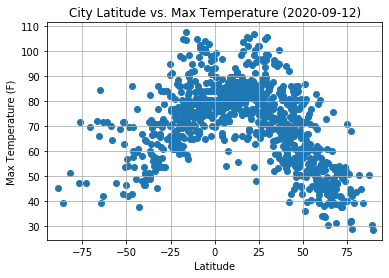

In [51]:
# Plot Latitude vs. Temperature
plt.grid(True)
plt.scatter(x=clean_city_data['Lat'], y=cities_df['Max Temp'])
plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs. Max Temperature ({str(date_rec[0])[:-9]})");
plt.xlim([-95,95])
plt.savefig('data/Fig_1_Lat_vs_Temp.png')

## Latitude vs. Humidity Plot

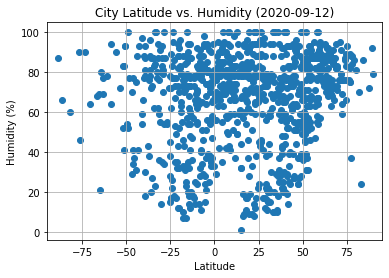

In [49]:
# Plot Latitude vs. Humidity
plt.scatter(x=clean_city_data['Lat'], y=cities_df['Humidity'])
plt.grid(True)
plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity ({str(date_rec[0])[:-9]})");
plt.xlim([-95,95])
plt.savefig('data/Fig_2_Lat_vs_Hum.png')

## Latitude vs. Cloudiness Plot

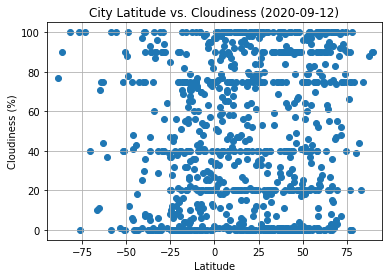

In [50]:
# Plot Latitude vs. Humidity
plt.scatter(x=clean_city_data['Lat'], y=cities_df['Cloudiness'])
plt.grid(True)
plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness ({str(date_rec[0])[:-9]})");
plt.xlim([-95,95])
plt.savefig('data/Fig_3_Lat_vs_Cloudiness.png')

## Latitude vs. Wind Speed Plot

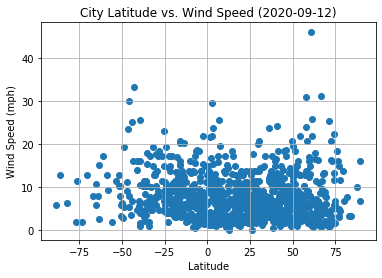

In [18]:
# Plot Latitude vs. Humidity
plt.scatter(x=clean_city_data['Lat'], y=cities_df['Wind Speed'])
plt.grid(True)
plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs. Wind Speed ({str(date_rec[0])[:-9]})");
plt.savefig('data/Fig_4_Lat_vs_Wind.png')

## Linear Regression

In [19]:
north_hem_pct = round(100*len(clean_city_data['Lat'].loc[clean_city_data['Lat']>=0])/len(clean_city_data['Lat']),2)
south_hem_pct = round(100*len(clean_city_data['Lat'].loc[clean_city_data['Lat']<0])/len(clean_city_data['Lat']),2)
print(f"Northern Hemisphere cities: {north_hem_pct}% | Southern Hemisphere cities: {south_hem_pct}%")

Northern Hemisphere cities: 67.47% | Southern Hemisphere cities: 32.53%


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']>=0])
y_values = np.array(clean_city_data['Max Temp'].loc[clean_city_data['Lat']>=0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.5546815150747245


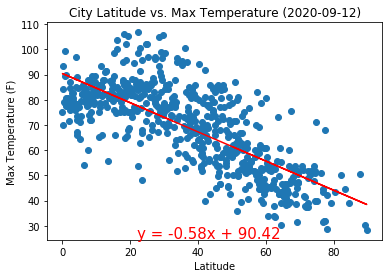

In [21]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (22, 25), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs. Max Temperature ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [22]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']<0])
y_values = np.array(clean_city_data['Max Temp'].loc[clean_city_data['Lat']<0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.37297049540198646


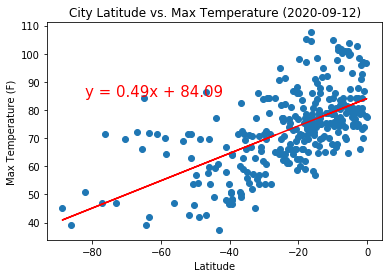

In [23]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-82, 85), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs. Max Temperature ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [24]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']>=0])
y_values = np.array(clean_city_data['Humidity'].loc[clean_city_data['Lat']>=0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.008113742100941748


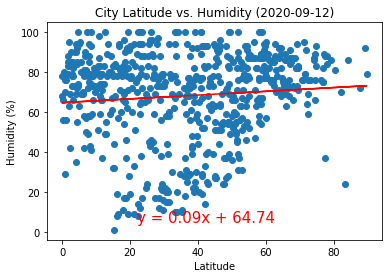

In [25]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (22, 5), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [26]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']<0])
y_values = np.array(clean_city_data['Humidity'].loc[clean_city_data['Lat']<0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.0125667885939969


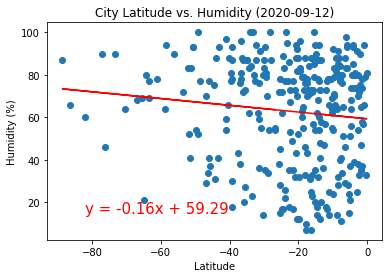

In [27]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-82, 15), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [28]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']>=0])
y_values = np.array(clean_city_data['Cloudiness'].loc[clean_city_data['Lat']>=0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 7.46135161033049e-06


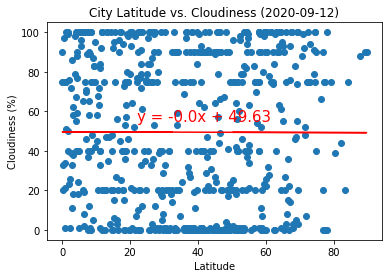

In [29]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (22, 55), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [30]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']<0])
y_values = np.array(clean_city_data['Cloudiness'].loc[clean_city_data['Lat']<0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.011002374283666844


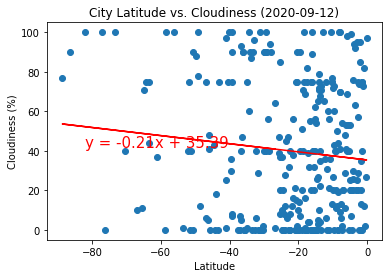

In [31]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-82, 42), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [32]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']>=0])
y_values = np.array(clean_city_data['Wind Speed'].loc[clean_city_data['Lat']>=0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.0022373892948654153


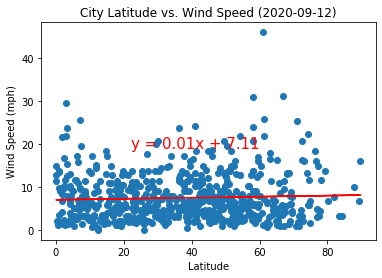

In [33]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (22, 19), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs. Wind Speed ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [34]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']<0])
y_values = np.array(clean_city_data['Wind Speed'].loc[clean_city_data['Lat']<0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.020956132031423314


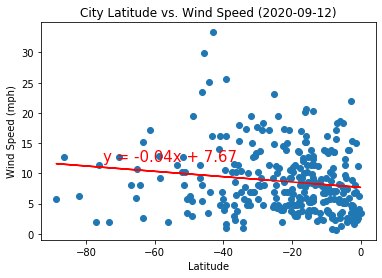

In [35]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-75, 12), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs. Wind Speed ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()